####  Problem 2

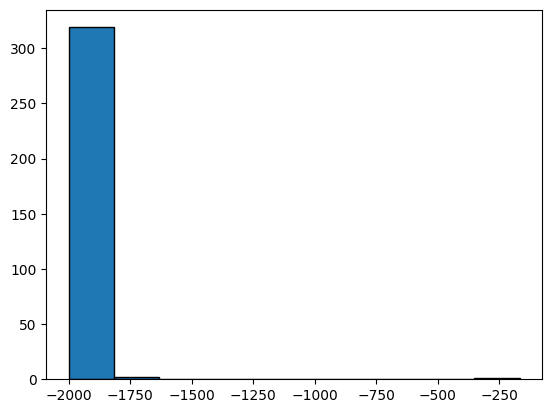

能量1: -1999.7107621023695


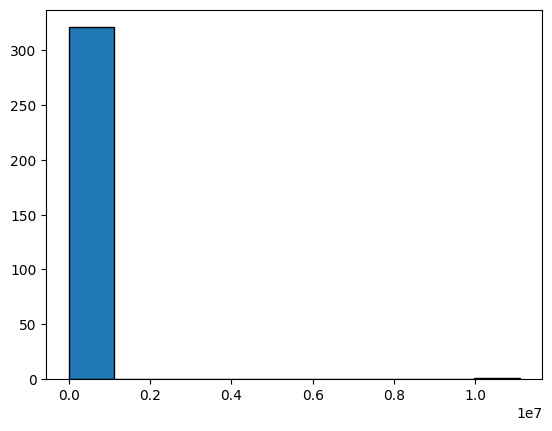

能量2: -3061.3505050460944


In [2]:
# Simulation Annealing
import numpy as np
import matplotlib.pyplot as plt
import math

def psi(r):
    return 4000 * ( math.pow(0.1/r, 12) - math.pow(0.1/r,6) )

# x is a numpy array of length 4
def E(X):
    S = 0
    for i in range(3):
        for j in range(i+1,4):
            r = abs(X[i] - X[j])
            S += psi(r) if r != 0 else 0
    return S

def SimAnnealing(T0, Tf, k, E, L):
    T = T0
    X = np.random.uniform(-1,1,size=(4,))
    best = [X]
    Elst = [E(X)]
    while T > Tf:
        Xlst = [X]
        # for a fixed T find a best X
        for _ in range(L):
            delta_x = np.random.normal(loc=0,scale=0.2)
            index = np.random.choice(4)
            
            item = X[index] + delta_x
            item = 2 - item if item > 1 else  -2 - item if item  < -1 else item
            
            Xt = np.zeros(4) + X
            Xt[index] = item
            
            delta_E = E(Xt) - E(X)
            if delta_E < 0:
                X = Xt
            else:
                p = np.exp(-delta_E/T)
                X = Xt if np.random.uniform(0,1) < p else X
            Xlst.append(X)
        
        bestX = min(Xlst,key=E)
        best.append(bestX)
        Elst.append(E(bestX))
        T = k * T
        
    return Elst

S1 = SimAnnealing(1,0.04,0.99,E=E,L=20)
plt.hist(S1,edgecolor='black') 
plt.show()  
print("能量1:",np.mean(S1[-10:-1]))

S2 = SimAnnealing(1,0.04,0.99,E=E,L=20)
plt.hist(S2,edgecolor='black') 
plt.show()  
print("能量2:",np.mean(S2[-10:-1]))
    
    

#### Problem 3

In [3]:

city = [(12,12),(18,23),(24,21),(29,25),(31,52),(36,43),(37,14),(42,8),(51,47),\
    (62,53),(63,19),(69,39),(81,7),(82,18),(83,40),(88,30)]

def TSP(city, T0, Tf, k, L):
    
    # distance cal func
    def d(i,j):
        cityi,cityj = city[i], city[j]
        return math.sqrt((cityi[0]-cityj[0])**2 + (cityi[1]-cityj[1])**2)
   
    # get distance_matrix
    def get_M(city):
        M = np.zeros((16,16))
        for i in range(16):
            for j in range(16):
                M[i][j] = d(i,j)
        return M
    global M
    M = get_M(city=city)
    
    # cal a instance
    def E(sigma):
        S = 0
        for i in range(len(sigma)-1):
            S += M[sigma[i]][sigma[i+1]]
        S += M[sigma[-1]][sigma[0]]
        return S
    
    # main
    atest = []
    btest = []
    
    T = T0
    best_sigma = []
    bs = None
    bl = None
    length = []
    sigma = np.random.permutation(np.arange(16))
    while T > Tf:
        sigmaLst = []
        for _ in range(L):
            i,j = np.random.choice(np.arange(16), size=2, replace=False)
            i,j = min(i,j),max(i,j)
            sigmaT = np.concatenate((sigma[0:i], sigma[i:j+1][::-1], sigma[j+1:])) 
            delta_E = E(sigmaT) - E(sigma)
            if delta_E < 0:
                sigma = sigmaT
            else:
                p = np.exp(-delta_E/T)
                sigma = sigmaT if np.random.uniform(0,1) < p else sigma
            sigmaLst.append(sigma)
    
        bestSigma = min(sigmaLst,key=E)
        best_sigma.append(bestSigma)
        length.append(E(bestSigma))
        T = k * T

    return best_sigma,length

S = TSP(city=city,T0=10000,Tf=0.01,k=0.995,L=25)

sig,length = S[0][-1],S[1][-1]
print(sig, length) 

[ 9  8  4  5  3  2  1  0  6  7 10 12 13 15 14 11] 231.57219629367683


#### Problem 6 
$$y = \frac{Ae^{rt}}{1+(A/K)e^{rt}} $$

In [56]:
years = list(range(1790,2000,10))
years = list(range(10,220,10))
populations = [3929214,5308483,7239881,9638453,12866020,17069453,23191876,31433321,39818449,\
    50155783,62947714,75994575,91972266,105710620,122775046,131669275,151325798,179323175,\
        203302031,226545805,248709873]
# populations = [item / 10**6 for item in populations]

A = 5716745.358744745, r = 0.02270348805223292, K = 387967738.12121123


/var/folders/2z/kvvrz9fx7575sz8vyx1php7c0000gn/T/ipykernel_20789/4258159083.py:5: RuntimeWarning: overflow encountered in exp
  return A * np.exp( r * t) / ( 1 + (A / K) * np.exp( r * t) )
/var/folders/2z/kvvrz9fx7575sz8vyx1php7c0000gn/T/ipykernel_20789/4258159083.py:5: RuntimeWarning: invalid value encountered in divide
  return A * np.exp( r * t) / ( 1 + (A / K) * np.exp( r * t) )


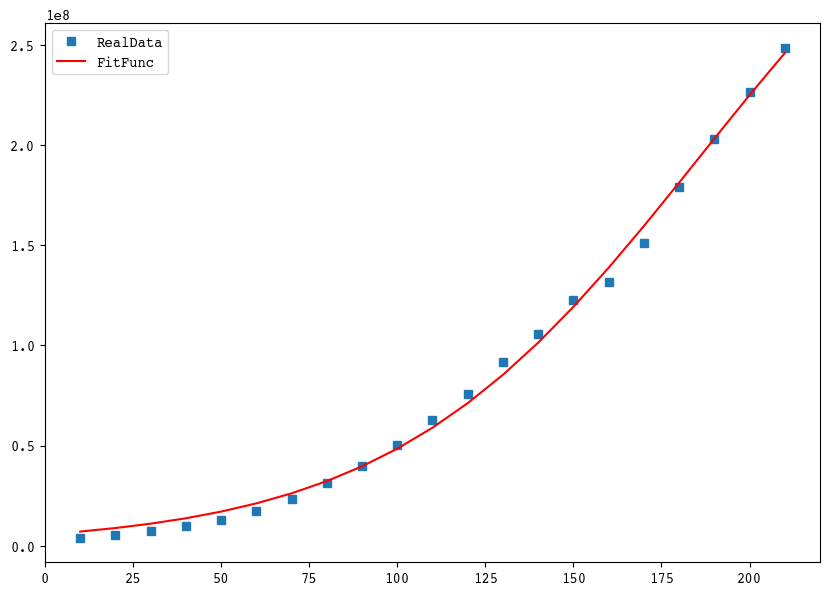

In [57]:
from scipy.optimize import curve_fit
plt.rcParams['font.sans-serif'] = ['Courier']  # 设置中文字体为Microsoft YaHei  
# target_func
def f(t,A,r,K):
    return A * np.exp( r * t) / ( 1 + (A / K) * np.exp( r * t) )

X = np.array(years)
Y = np.array(populations)
popt, pcov = curve_fit(f,X,Y)
A,r,K = popt[0],popt[1],popt[2]
# fitted function
def g(t):
    return f(t,A,r,K)

print("A = {}, r = {}, K = {}".format(A, r, K))

fig = plt.figure(figsize = (10, 7))
plt.plot(years, populations, "s", label="RealData")  
plt.plot(X, g(X), "r", label="FitFunc")  
plt.legend()
plt.show()

In [65]:
# 预计2020年人口数
print("2020人口数:{:.0f}人".format(g(240)))

2020人口数:300305875人
